In [38]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Load the Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")


In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [44]:
df_titanic=pd.DataFrame(titanic)
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


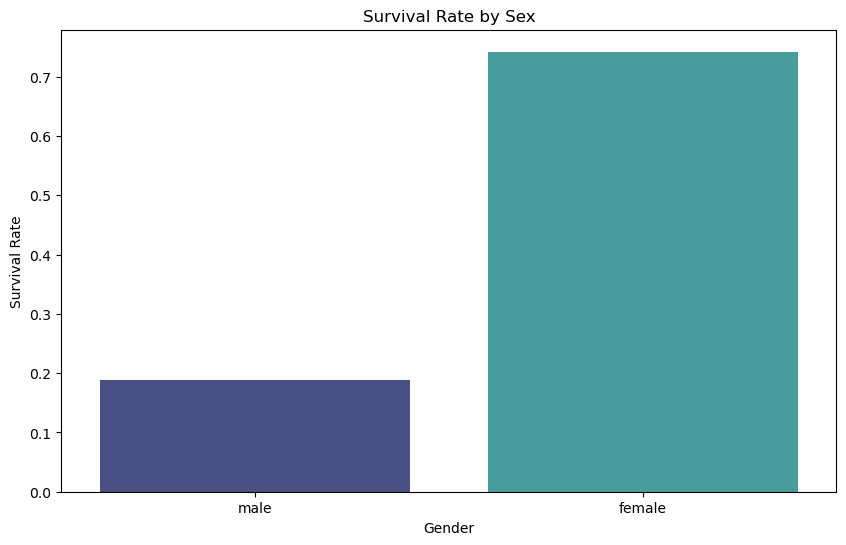

In [91]:
#Create a barplot for Survival Rate by Sex

plt.figure(figsize=(10, 6))
sns.barplot(x="sex", y="survived", data = df_titanic, errorbar=None, palette='mako')

# Set the title and labels
plt.title("Survival Rate by Sex")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

# Show the plot
plt.show()

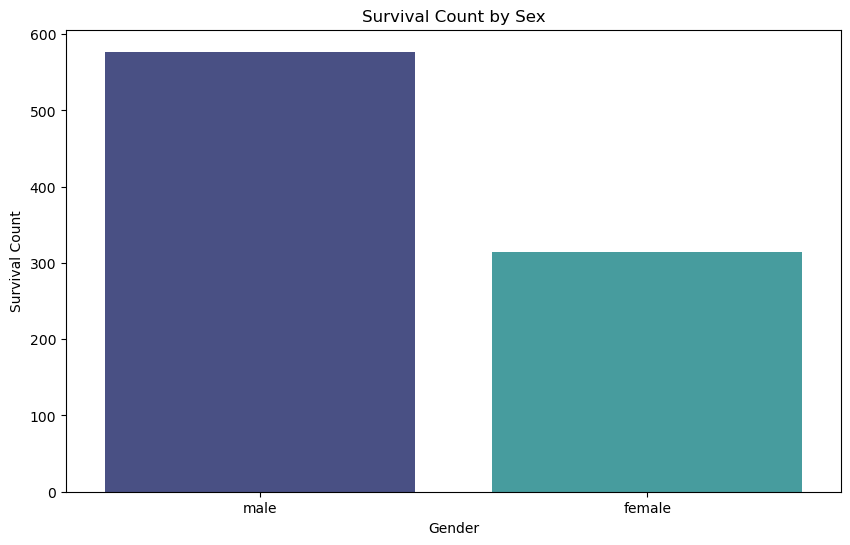

In [99]:
# Group the data by sex and count the total occurrences
gender_counts = df_titanic['sex'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='mako')

# Set the title and labels
plt.title("Survival Count by Sex")
plt.xlabel("Gender")
plt.ylabel("Survival Count")

# Show the plot
plt.show()


### Shows distortion of values in the following ways
- Uses a count plot instead of a ratio
- Labels do not properly labeled leading one to believe more males survived when this graph lumps everyone together and really shows a total of all passengers inlcuding those who survived and those who did not
- 

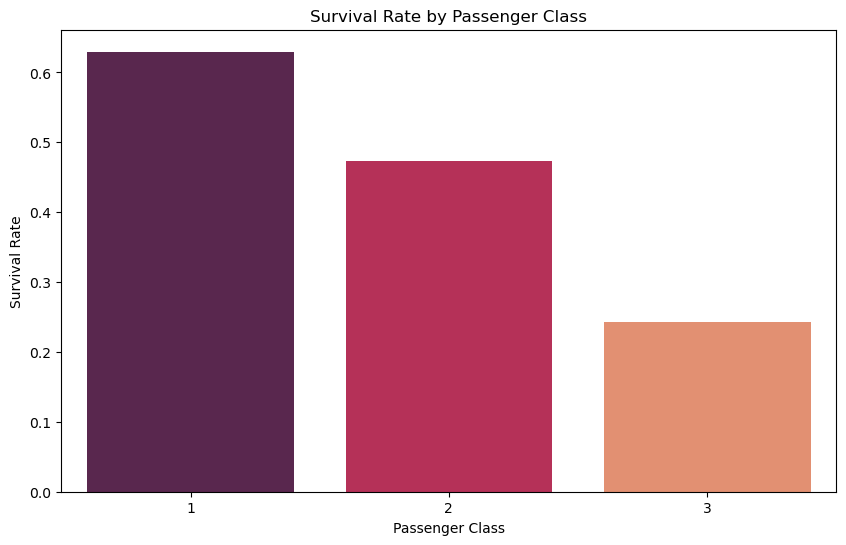

In [81]:
#Survival Rate by Passenger Class

plt.figure(figsize=(10, 6))
sns.barplot(x="pclass", y="survived", data = df_titanic, errorbar=None, palette='rocket')

# Set the title and labels
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

# Show the plot
plt.show()

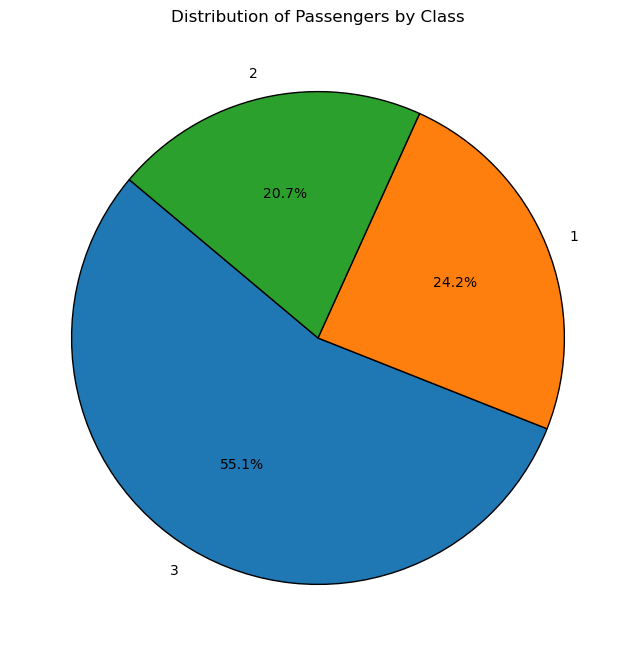

In [107]:
# Pie chart for Parent Child distribution
pass_class = df_titanic['pclass'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(pass_class, labels=pass_class.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Passengers by Class")
plt.show()

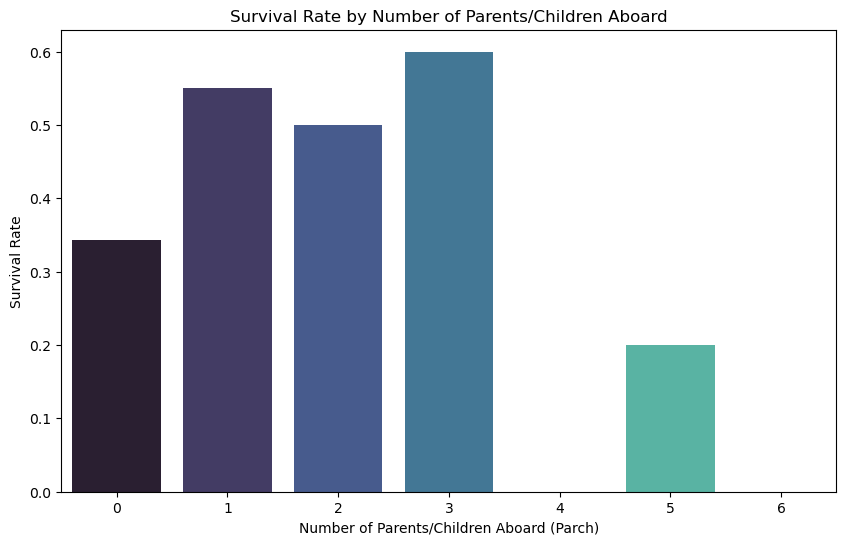

In [109]:
# Bar chart for survival rates grouped by Parent Child count

plt.figure(figsize=(10, 6))
sns.barplot(x=df_titanic["parch"], y=df_titanic["survived"], errorbar=None, palette='mako')

# Set x-axis label
plt.xlabel("Number of Parents/Children Aboard (Parch)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Number of Parents/Children Aboard")


plt.show()